
# What are the most demanded skills for the top 3 most popular data roles?

#### Methodology
1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

___

### Importing Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filtering the Data for the United States

In [2]:
df_US = df[df['job_country'] == 'United States']

### Exploding the Job Skills

In [3]:
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


### Counting Skills per Job Title

In [4]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [5]:
type(df_skills_count)

pandas.core.series.Series

In [7]:
# Want to transfer this into a Data Frame to make it a little easier to manipulate
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# So the index is reset, and the values column is renamed to skill_count
df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [8]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()


df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sorting the values from highest to lowest
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
#df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False) would have worked as well

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


### Creating a List of the Top 3 Roles

In [10]:
job_titles = df_skills_count['job_title_short'].unique()

job_titles

array(['Data Scientist', 'Data Analyst', 'Data Engineer',
       'Senior Data Scientist', 'Senior Data Analyst',
       'Senior Data Engineer', 'Business Analyst', 'Software Engineer',
       'Machine Learning Engineer', 'Cloud Engineer'], dtype=object)

In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [14]:
# Want to focus on the top 3 results

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

In [15]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3]) # sorted() so that it is in alphabetical order

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

##### Top 3 Roles: Data Analysts, Data Engineers, and Data Scientists

### Plotting Skill Counts

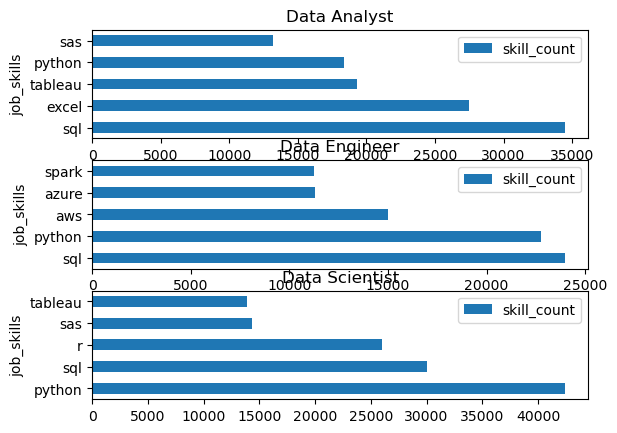

In [16]:
fig, ax = plt.subplots(len(job_titles), 1) #to get all 3 charct in 1 column

for i, job_title in enumerate(job_titles): #to iterate through each title and plot the graph 
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) #defining the desire data frame and filtering to the top 5
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)

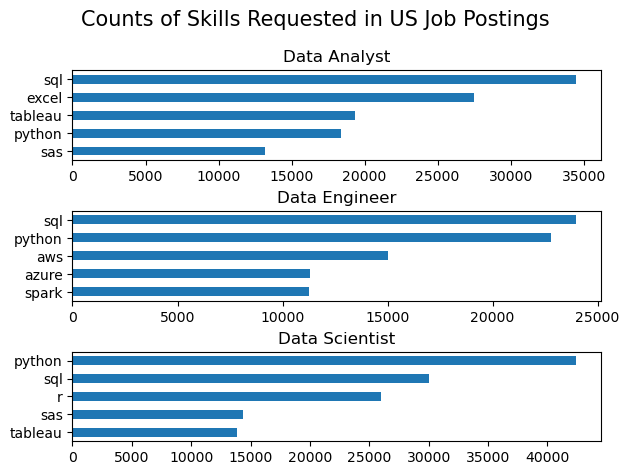

In [19]:
#Cleaning
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

### Converting Counts to Percentages
##### Focus: Counts don't show what portions of jobs are requesting these skill

In [21]:
#Perform an aggregation to get how many job postings there are for data scientists, data analysts, and data engineers
#Then, with total number of job postings, take that skill_count, divided it by that total, and get what is the percentage of a skill in a job posting
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [22]:
df_US['job_title_short'].value_counts()

job_title_short
Data Analyst                 67816
Data Scientist               58830
Data Engineer                35080
Senior Data Scientist        12946
Senior Data Analyst          11791
Senior Data Engineer          9289
Business Analyst              7382
Software Engineer             1814
Machine Learning Engineer      921
Cloud Engineer                 423
Name: count, dtype: int64

In [24]:
df_US['job_title_short'].value_counts().reset_index(name='jobs_total') #making it a data frame and naminfg the value_counts column

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [25]:
# This has the couns for all the different jobs
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [26]:
#Need to merger df_job_title_count with df_skills_cout on the job title short column

pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
#left join so that everything on the left table of df_skills_count is maintained and want to merge what's available onto this df
#we are merging on the job_title_short column

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


jobs_total column appened righ onto this data frame

In [27]:
#Now, get the skill percentage
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


### Plot Percentage Count

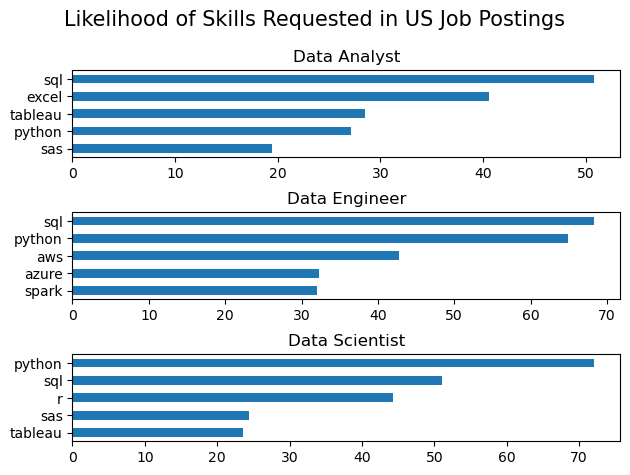

In [29]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

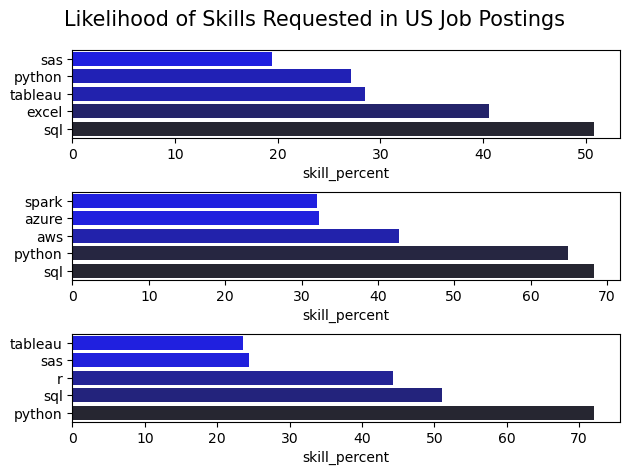

In [30]:
#Cleaning - Upgrading chart by using Seaborn instead

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

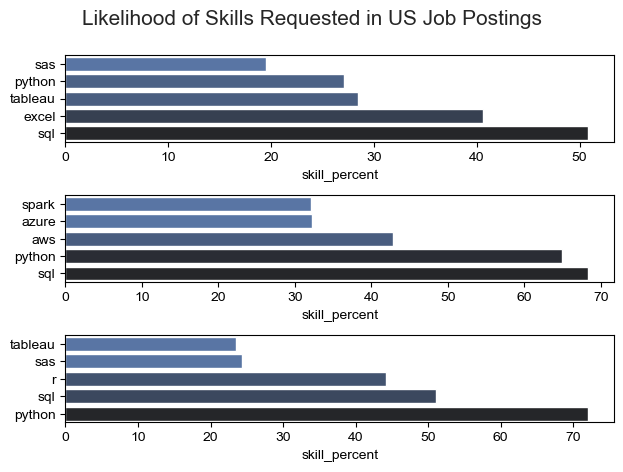

In [31]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

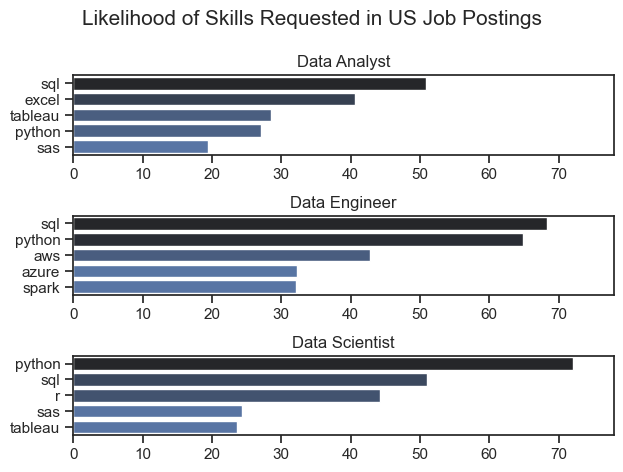

In [33]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78) #so all charts are on the same axis

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

#Note: Seaborn does not plot backwards like Mathplotlib, so there is no need to invert the axis

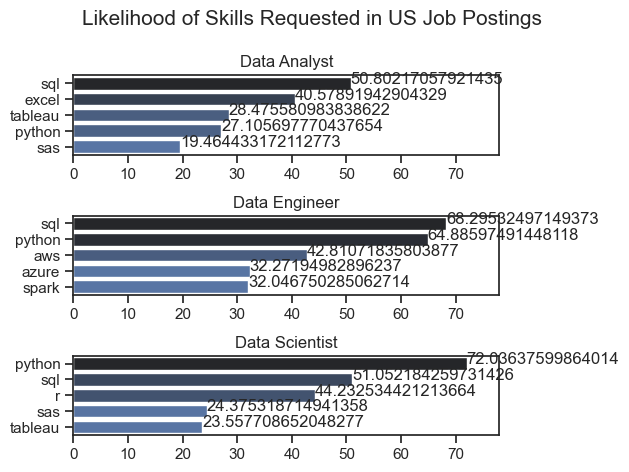

In [35]:
# Want to label bars with the percentage
# To get percentage, loop through df_plt, specifically going thrrough that skill_percent coulmn to get those values then plot them. 

fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    #this loop will be inside of the loop above
    # label the percentage on the bars
    #cycling through the index (n) and values (v) in df_plot['skill_percent']), which is enumerated to get the index
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v, n, v) 
        #plt.text() for labeling. ax[i].text() to use the actual axis itsself
        #Wih this function, specify the x value then the y value to plot over
            #in this case: the x of what percent and the y of how many index levels down to plot
        #ax[i].text(x (the value v), y (n, the index position from it ), plotting the values itsself on there (v))

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

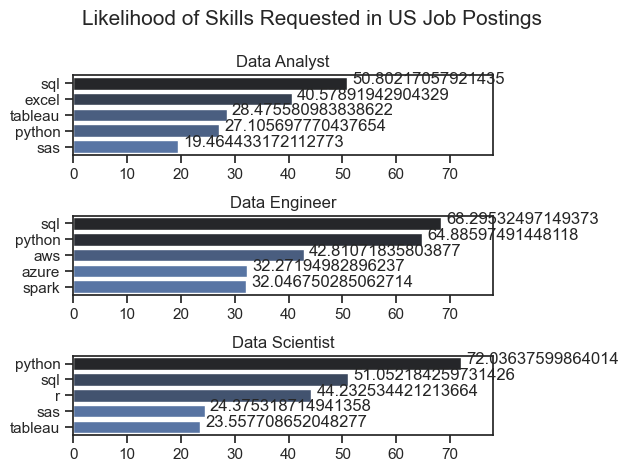

In [37]:
#Cleaning
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, v)
        # v + 1: + 1 so the number are not too clode to the bar
       
       
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

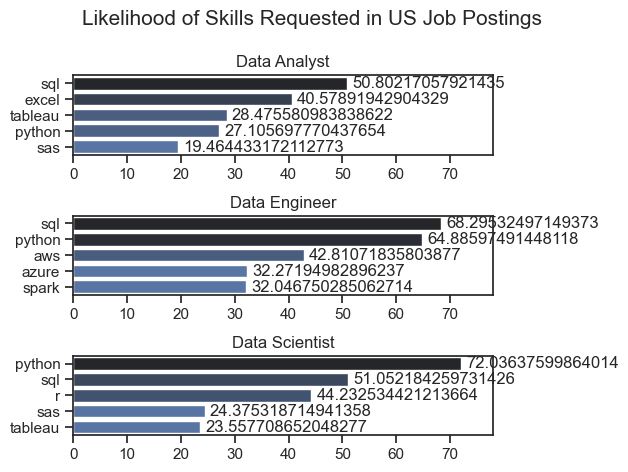

In [39]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, v , va='center')
        # v + 1: + 1 so the number are not too clode to the bar
        # va='center': the number were slightly up. This centers it
       

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

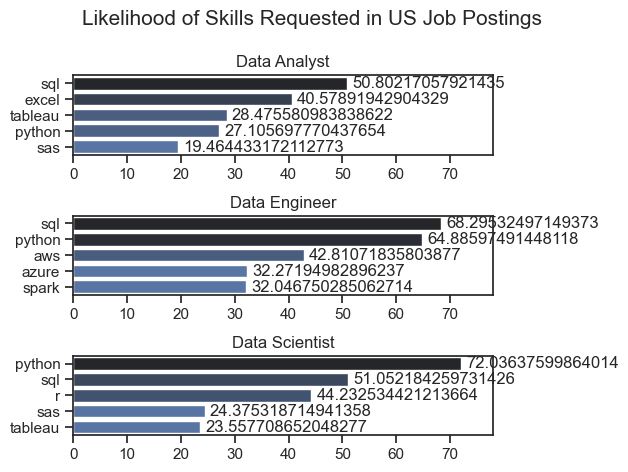

In [41]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v}', va='center')
        # v + 1: + 1 so the number are not too clode to the bar
        # va='center': the number were slightly up. This centers it
        # using f'' to clean up the numbers

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

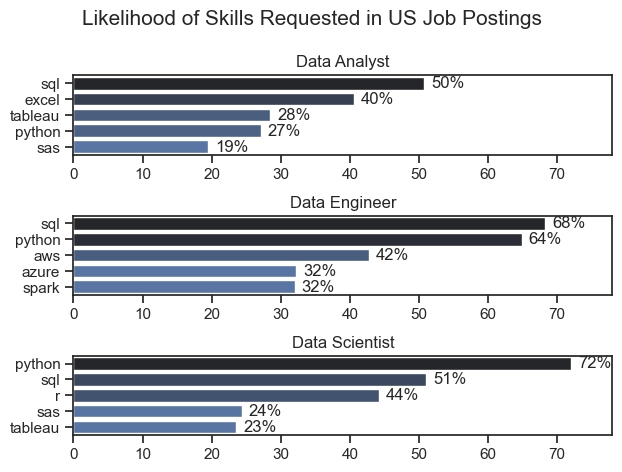

In [42]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{int(v)}%', va='center')
        # v + 1: + 1 so the number are not too clode to the bar
        # va='center': the number were slightly up. This centers it
        # using f'' to clean up the numbers
            #int(v) to get ride of decimal places
            # adding % symbol

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

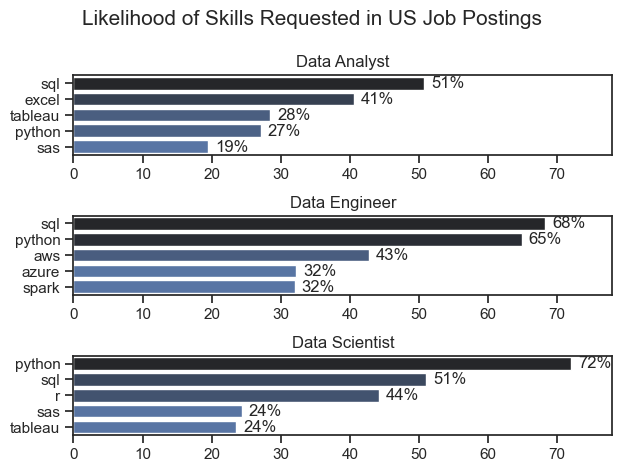

In [43]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
        # v + 1: + 1 so the number are not too clode to the bar
        # va='center': the number were slightly up. This centers it
        # using f'' to clean up the numbers
            #int(v) to get ride of decimal places
                #Want to be more honest with out number so v:.0f is used instead
            # adding % symbol

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

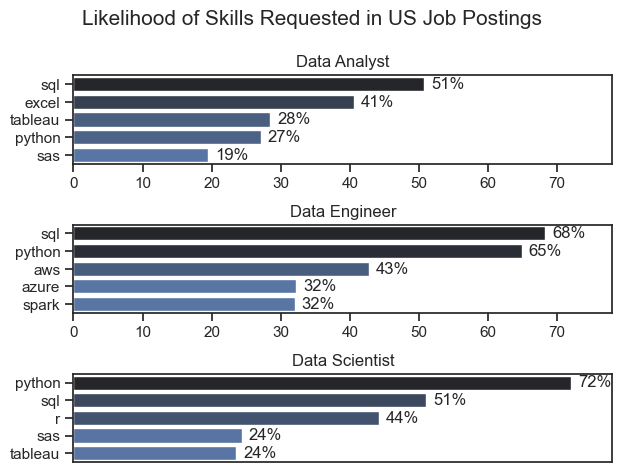

In [45]:
# The x-axis is too repetitive and has too many number, espcially ith the data labels already there
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

#so
ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

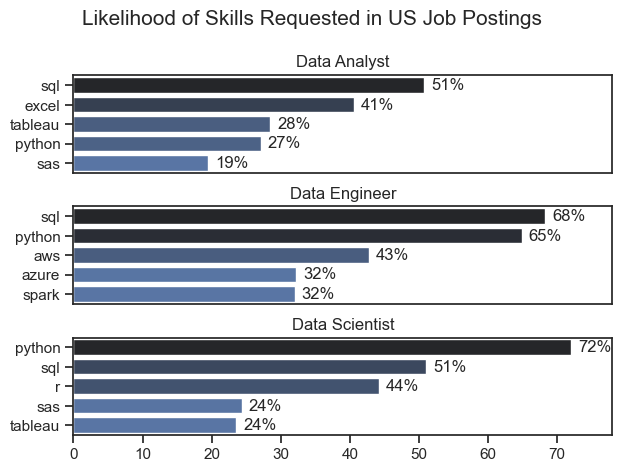

In [48]:
# Keeping the axis on the last plot
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)


    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    
    if i != len(job_titles) - 1: #if the index does not = 2 (Data Scientist index is 2),
        ax[i].set_xticks([]) #then set the x-axis to nothing

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()